In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import pickle

In [ ]:
data="/content/drive/MyDrive/dataset/bf3_data_2022_01_07.csv"
df=pd.read_csv(data)

In [ ]:
df.head(10)

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.9
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.5
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.6
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.2
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.7
5,01-07-21 01:00,312520.0,3.20,126.0,4.0,189.0,3.39,3.25,7916.0,23.08,...,139.0,117.0,132.0,0.0,128.0,2.0,22.30,21.10,4.12,72.2
6,01-07-21 01:10,313179.0,3.18,126.0,4.0,188.0,3.37,3.23,7925.0,23.08,...,134.0,121.0,130.0,0.0,129.0,1.0,22.25,21.00,4.09,73.6
7,01-07-21 01:20,312075.0,3.19,126.0,4.0,189.0,3.38,3.24,7921.0,23.08,...,130.0,109.0,124.0,0.0,121.0,2.0,22.24,21.10,4.12,74.7
8,01-07-21 01:40,306696.0,3.15,126.0,4.0,188.0,3.34,3.20,7917.0,23.08,...,135.0,117.0,130.0,0.0,125.0,1.0,22.43,21.20,4.10,75.0
9,01-07-21 01:50,311590.0,3.20,127.0,4.0,191.0,3.38,3.25,7900.0,23.08,...,135.0,128.0,135.0,0.0,130.0,1.0,22.48,21.03,4.07,75.8


In [ ]:
df.tail(10)

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
25395,31-12-21 22:20,287873.0,2.84,77.0,4.0,191.0,3.04,2.89,2890.0,22.35,...,140.0,128.0,133.0,0.1,133.0,1.0,22.21,20.18,3.30,73.8
25396,31-12-21 22:30,280321.0,2.78,77.0,4.0,190.0,2.97,2.82,2903.0,22.35,...,127.0,125.0,123.0,0.1,122.0,1.0,22.23,20.31,3.39,72.1
25397,31-12-21 22:40,289883.0,2.80,77.0,3.0,189.0,2.99,2.84,2913.0,22.31,...,114.0,109.0,121.0,0.1,112.0,1.0,22.23,20.04,3.26,70.4
25398,31-12-21 22:50,286604.0,2.80,77.0,2.0,188.0,2.98,2.85,2897.0,22.32,...,107.0,99.0,117.0,0.1,105.0,1.0,21.97,20.13,3.31,68.4
25399,31-12-21 23:00,288786.0,2.82,76.0,1.0,189.0,2.99,2.86,2652.0,22.22,...,117.0,111.0,132.0,0.1,116.0,1.0,21.95,20.09,3.14,67.8
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,116.0,108.0,122.0,0.2,111.0,1.0,21.90,20.25,3.10,65.9
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,113.0,105.0,119.0,0.2,110.0,1.0,22.09,20.14,3.04,64.3
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,116.0,108.0,115.0,0.1,110.0,1.0,22.04,20.20,2.99,64.3
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,119.0,113.0,121.0,0.2,115.0,1.0,22.03,20.27,3.09,63.5
25404,31-12-21 23:50,274728.0,2.73,77.0,2.0,189.0,2.90,2.78,2593.0,22.23,...,120.0,111.0,121.0,0.1,116.0,1.0,22.03,20.35,3.23,62.8


In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['DATE_TIME'] = df['DATE_TIME'].apply(lambda x: x.timestamp())


#--> pd.to_datetime function from pandas library  to convert
#the values in the 'DATE_TIME'column of the DataFrame df to datetime objects
#The result is assigned back to the 'DATE_TIME' column

#useful when when date and time contains strings and other d-type

#--> being applied is a lambda function that takes each datetime
#object x and calls its timestamp() method.The timestamp() method returns a
#Unix timestamp, which is a floating-point number representing the number
#of seconds


<ipython-input-7-0fc0b8a8380d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.9
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.5
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.6
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.2
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,116.0,108.0,122.0,0.2,111.0,1.0,21.90,20.25,3.10,65.9
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,113.0,105.0,119.0,0.2,110.0,1.0,22.09,20.14,3.04,64.3
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,116.0,108.0,115.0,0.1,110.0,1.0,22.04,20.20,2.99,64.3
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,119.0,113.0,121.0,0.2,115.0,1.0,22.03,20.27,3.09,63.5


In [ ]:
df.isnull().sum()

DATE_TIME           0
CB_FLOW          2665
CB_PRESS           32
CB_TEMP            32
STEAM_FLOW       2665
STEAM_TEMP         32
STEAM_PRESS        32
O2_PRESS           32
O2_FLOW          2665
O2_PER             32
PCI              2665
ATM_HUMID          32
HB_TEMP          3817
HB_PRESS         2746
TOP_PRESS        2665
TOP_TEMP1          32
TOP_TEMP2          32
TOP_TEMP3          32
TOP_TEMP4          32
TOP_SPRAY          32
TOP_TEMP           32
TOP_PRESS_1      2665
CO               2665
CO2              2665
H2               2665
SKIN_TEMP_AVG       0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.9
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.5
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.6
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.2
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,116.0,108.0,122.0,0.2,111.0,1.0,21.90,20.25,3.10,65.9
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,113.0,105.0,119.0,0.2,110.0,1.0,22.09,20.14,3.04,64.3
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,116.0,108.0,115.0,0.1,110.0,1.0,22.04,20.20,2.99,64.3
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,119.0,113.0,121.0,0.2,115.0,1.0,22.03,20.27,3.09,63.5


In [ ]:
df.shape

(21515, 26)

In [ ]:
df.isnull().sum()

DATE_TIME        0
CB_FLOW          0
CB_PRESS         0
CB_TEMP          0
STEAM_FLOW       0
STEAM_TEMP       0
STEAM_PRESS      0
O2_PRESS         0
O2_FLOW          0
O2_PER           0
PCI              0
ATM_HUMID        0
HB_TEMP          0
HB_PRESS         0
TOP_PRESS        0
TOP_TEMP1        0
TOP_TEMP2        0
TOP_TEMP3        0
TOP_TEMP4        0
TOP_SPRAY        0
TOP_TEMP         0
TOP_PRESS_1      0
CO               0
CO2              0
H2               0
SKIN_TEMP_AVG    0
dtype: int64

In [ ]:
#Add CO/CO2 column, CO/CO2_1hr, CO/CO2_2hr, CO/CO2_3hr, CO/CO2_4hr
df['CO/CO2 RATIO'] = df['CO'] / df['CO2']
df['CO/CO2_RATIO_AFTER_1_HOUR'] = df['CO'].shift(-6) / df['CO2'].shift(-6)
df['CO/CO2_RATIO_AFTER_2_HOURS'] = df['CO'].shift(-12) / df['CO2'].shift(-12)
df['CO/CO2_RATIO_AFTER_3_HOURS'] = df['CO'].shift(-18) / df['CO2'].shift(-18)
df['CO/CO2_RATIO_AFTER_4_HOURS'] = df['CO'].shift(-24) / df['CO2'].shift(-24)

<ipython-input-14-45e91a0c96b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO/CO2 RATIO'] = df['CO'] / df['CO2']
<ipython-input-14-45e91a0c96b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO/CO2_RATIO_AFTER_1_HOUR'] = df['CO'].shift(-6) / df['CO2'].shift(-6)
<ipython-input-14-45e91a0c96b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,2.0,22.22,21.00,3.88,69.9,1.058095,1.059524,1.046161,1.050472,1.058491
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,1.0,22.56,21.00,3.94,71.5,1.074286,1.054028,1.056524,1.057237,1.053227
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,1.0,22.49,21.08,3.94,70.6,1.066888,1.058019,1.059849,1.047798,1.064272
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,1.0,22.36,21.13,3.99,70.2,1.058211,1.068949,1.054041,1.049906,1.069162
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,1.0,22.25,21.30,4.10,70.7,1.044601,1.066888,1.040300,1.058101,1.070583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,1.0,21.90,20.25,3.10,65.9,1.081481,NaN,NaN,NaN,NaN
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,1.0,22.09,20.14,3.04,64.3,1.096822,NaN,NaN,NaN,NaN
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,1.0,22.04,20.20,2.99,64.3,1.091089,NaN,NaN,NaN,NaN
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,1.0,22.03,20.27,3.09,63.5,1.086828,NaN,NaN,NaN,NaN


In [ ]:
column_median= df['CO/CO2_RATIO_AFTER_1_HOUR'].median()
df['CO/CO2_RATIO_AFTER_1_HOUR'].fillna(column_median, inplace=True)
column_median1 = df['CO/CO2_RATIO_AFTER_2_HOURS'].median()
df['CO/CO2_RATIO_AFTER_2_HOURS'].fillna(column_median1, inplace=True)
column_median2 = df['CO/CO2_RATIO_AFTER_3_HOURS'].median()
df['CO/CO2_RATIO_AFTER_3_HOURS'].fillna(column_median2, inplace=True)
column_median3 = df['CO/CO2_RATIO_AFTER_4_HOURS'].median()
df['CO/CO2_RATIO_AFTER_4_HOURS'].fillna(column_median3, inplace=True)

<ipython-input-16-3ce04f6374b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO/CO2_RATIO_AFTER_1_HOUR'].fillna(column_median, inplace=True)
<ipython-input-16-3ce04f6374b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO/CO2_RATIO_AFTER_2_HOURS'].fillna(column_median1, inplace=True)
<ipython-input-16-3ce04f6374b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO/CO2_RATIO_AFTER_3_HOURS'].fillna(column_median2, in

In [ ]:
df

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.609978e+09,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,2.0,22.22,21.00,3.88,69.9,1.058095,1.059524,1.046161,1.050472,1.058491
1,1.609979e+09,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,1.0,22.56,21.00,3.94,71.5,1.074286,1.054028,1.056524,1.057237,1.053227
2,1.609979e+09,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,1.0,22.49,21.08,3.94,70.6,1.066888,1.058019,1.059849,1.047798,1.064272
3,1.609980e+09,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,1.0,22.36,21.13,3.99,70.2,1.058211,1.068949,1.054041,1.049906,1.069162
4,1.609981e+09,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,1.0,22.25,21.30,4.10,70.7,1.044601,1.066888,1.040300,1.058101,1.070583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,1.640992e+09,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,1.0,21.90,20.25,3.10,65.9,1.081481,1.085621,1.085648,1.085687,1.085728
25401,1.640993e+09,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,1.0,22.09,20.14,3.04,64.3,1.096822,1.085621,1.085648,1.085687,1.085728
25402,1.640993e+09,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,1.0,22.04,20.20,2.99,64.3,1.091089,1.085621,1.085648,1.085687,1.085728
25403,1.640994e+09,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,1.0,22.03,20.27,3.09,63.5,1.086828,1.085621,1.085648,1.085687,1.085728


In [ ]:
df.isnull().sum()

DATE_TIME                     0
CB_FLOW                       0
CB_PRESS                      0
CB_TEMP                       0
STEAM_FLOW                    0
STEAM_TEMP                    0
STEAM_PRESS                   0
O2_PRESS                      0
O2_FLOW                       0
O2_PER                        0
PCI                           0
ATM_HUMID                     0
HB_TEMP                       0
HB_PRESS                      0
TOP_PRESS                     0
TOP_TEMP1                     0
TOP_TEMP2                     0
TOP_TEMP3                     0
TOP_TEMP4                     0
TOP_SPRAY                     0
TOP_TEMP                      0
TOP_PRESS_1                   0
CO                            0
CO2                           0
H2                            0
SKIN_TEMP_AVG                 0
CO/CO2 RATIO                  0
CO/CO2_RATIO_AFTER_1_HOUR     0
CO/CO2_RATIO_AFTER_2_HOURS    0
CO/CO2_RATIO_AFTER_3_HOURS    0
CO/CO2_RATIO_AFTER_4_HOURS    0
dtype: i

In [ ]:
X = df[['DATE_TIME', 'CB_FLOW', 'CB_PRESS', 'CB_TEMP', 'STEAM_FLOW', 'STEAM_TEMP', 'STEAM_PRESS','O2_PRESS', 'O2_FLOW', 'O2_PER', 'PCI', 'ATM_HUMID', 'HB_TEMP', 'HB_PRESS', 'TOP_PRESS','TOP_TEMP1', 'TOP_SPRAY', 'TOP_TEMP', 'TOP_PRESS_1', 'H2', 'CO', 'CO2']]
y = df[['CO/CO2 RATIO','CO/CO2_RATIO_AFTER_1_HOUR','CO/CO2_RATIO_AFTER_2_HOURS','CO/CO2_RATIO_AFTER_3_HOURS','CO/CO2_RATIO_AFTER_4_HOURS']]

In [ ]:
y

,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
0,1.058095,1.059524,1.046161,1.050472,1.058491
1,1.074286,1.054028,1.056524,1.057237,1.053227
2,1.066888,1.058019,1.059849,1.047798,1.064272
3,1.058211,1.068949,1.054041,1.049906,1.069162
4,1.044601,1.066888,1.040300,1.058101,1.070583
...,...,...,...,...,...
25400,1.081481,1.085621,1.085648,1.085687,1.085728
25401,1.096822,1.085621,1.085648,1.085687,1.085728
25402,1.091089,1.085621,1.085648,1.085687,1.085728
25403,1.086828,1.085621,1.085648,1.085687,1.085728


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models=[]
for i in range(5):
  model = RandomForestRegressor(n_estimators=50, random_state=21)
  model.fit(X_train, y_train.iloc[:,i])
#[:, i] selects all elements along the first axis and only the i-th element along the second axis.
  models.append(model)

In [ ]:
predictions = []
for i in range(5):
    y_pred = models[i].predict(X_test)
    predictions.append(y_pred)

In [ ]:
y_test

,CO/CO2 RATIO,CO/CO2_RATIO_AFTER_1_HOUR,CO/CO2_RATIO_AFTER_2_HOURS,CO/CO2_RATIO_AFTER_3_HOURS,CO/CO2_RATIO_AFTER_4_HOURS
423,1.044413,1.043744,1.044630,1.057971,1.031452
14365,1.028285,1.019725,1.040892,1.036954,1.040363
23654,1.106509,1.080097,1.052555,1.071222,1.095356
24463,1.135853,1.139920,1.158161,1.107495,1.112043
8694,1.171120,1.196859,1.223983,1.231501,1.570194
...,...,...,...,...,...
11859,1.059326,1.057116,1.086402,1.068279,1.045243
2774,1.064085,1.055556,1.046140,1.048314,1.044505
13600,1.081262,0.946828,1.045124,1.114637,1.096238
16318,4.703956,4.551365,5.512739,1.909160,1.839650


In [ ]:
accuracy_values = []
mse_values = []
for i in range(5):
  mse = mean_squared_error(y_test.iloc[:,i], predictions[i])
  mse_values.append(mse)
  print(y_test.iloc[:,i])
  print(predictions[i])
  print(f"Mean Squared Error: {mse}")
  accuracy= 1- mse
  print(f"Accuracy: {accuracy}")
  accuracy_values.append(accuracy)

423      1.044413
14365    1.028285
23654    1.106509
24463    1.135853
8694     1.171120
           ...   
11859    1.059326
2774     1.064085
13600    1.081262
16318    4.703956
17890    1.389330
Name: CO/CO2 RATIO, Length: 4303, dtype: float64
[1.0447126  1.02851202 1.10662292 ... 1.08127642 4.38589276 1.38890719]
Mean Squared Error: 0.00012559862800328876
Accuracy: 0.9998744013719967
423      1.043744
14365    1.019725
23654    1.080097
24463    1.139920
8694     1.196859
           ...   
11859    1.057116
2774     1.055556
13600    0.946828
16318    4.551365
17890    1.402411
Name: CO/CO2_RATIO_AFTER_1_HOUR, Length: 4303, dtype: float64
[1.04339423 1.03738573 1.09933994 ... 1.09485615 4.955762   1.38730432]
Mean Squared Error: 0.0012243940427198445
Accuracy: 0.9987756059572802
423      1.044630
14365    1.040892
23654    1.052555
24463    1.158161
8694     1.223983
           ...   
11859    1.086402
2774     1.046140
13600    1.045124
16318    5.512739
17890    1.358887
Name: CO

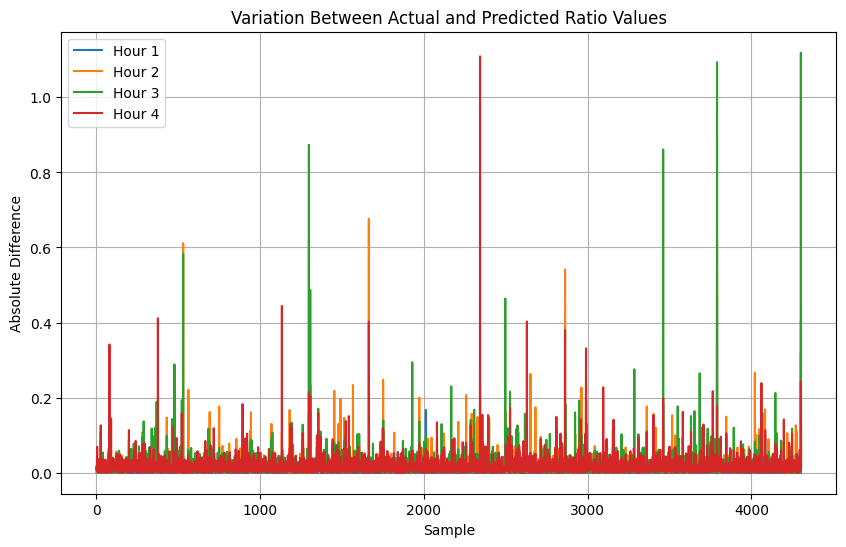

In [ ]:
absolute_difference_values = []
for i in range(5):
    absolute_difference = np.abs(y_test.iloc[:, i] - predictions[i])
    absolute_difference_values.append(absolute_difference)

# Create a line plot to visualize the variation in the absolute difference values
plt.figure(figsize=(10, 6))
hours_range = np.arange(1, y_test.shape[0]+1)  # Adjust the range based on the shape of y_test
for i in range(4):
    plt.plot(hours_range, absolute_difference_values[i], label=f"Hour {i+1}")

plt.xlabel('Sample')
plt.ylabel('Absolute Difference')
plt.title('Variation Between Actual and Predicted Ratio Values')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('variation_plot.png')

# Display the plot
plt.show()

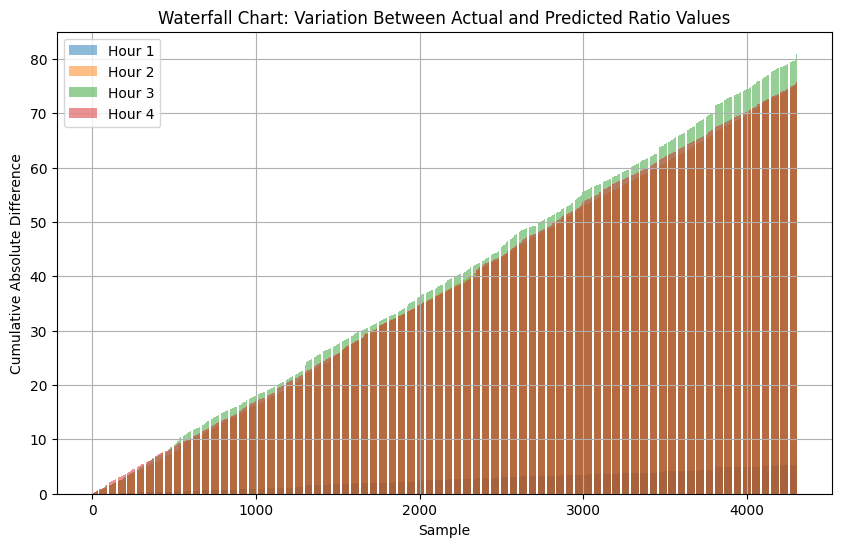

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your code to calculate absolute_difference_values

# Create a waterfall chart to visualize the variation in the absolute difference values
plt.figure(figsize=(10, 6))

for i in range(4):
    cumulative_difference = np.cumsum(absolute_difference_values[i])
    plt.bar(range(y_test.shape[0]), cumulative_difference, label=f"Hour {i+1}", alpha=0.5)

plt.xlabel('Sample')
plt.ylabel('Cumulative Absolute Difference')
plt.title('Waterfall Chart: Variation Between Actual and Predicted Ratio Values')
plt.legend()
plt.grid(True)

# Save the waterfall chart to a file
plt.savefig('waterfall_chart.png')

# Display the waterfall chart
plt.show()


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
from IPython.display import FileLink

pickle_file_path = 'model.pkl'

# Create a link to download the file
FileLink(pickle_file_path)


/content/model.pkl

In [ ]:
pip install Flask numpy matplotlib scikit-learn


In [ ]:
from flask import Flask, render_template, request, redirect, url_for, jsonify
import pickle
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
from sklearn.metrics import mean_squared_error

app = Flask(__name__)

# Load the trained machine learning model
model = pickle.load(open("/content/model.pkl", "rb"))

@app.route('/')
def home():
    return render_template('/content/drive/MyDrive/ds/index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input values from the form
        cb_flow = float(request.form.get("CB_FLOW"))
        cb_press = float(request.form.get("CB_PRESS"))
        cb_temp = float(request.form.get("CB_TEMP"))
        steam_flow = float(request.form.get("STEAM_FLOW"))
        steam_temp = float(request.form.get("STEAM_TEMP"))
        steam_press = float(request.form.get("STEAM_PRESS"))
        o2_press = float(request.form.get("O2_PRESS"))
        o2_flow = float(request.form.get("O2_FLOW"))
        o2_per = float(request.form.get("O2_PER"))
        pci = float(request.form.get("PCI"))
        atm_humid = float(request.form.get("ATM_HUMID"))
        hb_temp = float(request.form.get("HB_TEMP"))
        hb_press = float(request.form.get("HB_PRESS"))
        top_press = float(request.form.get("TOP_PRESS"))
        top_temp1 = float(request.form.get("TOP_TEMP1"))
        top_spray = float(request.form.get("TOP_SPRAY"))
        top_temp = float(request.form.get("TOP_TEMP"))
        top_press_1 = float(request.form.get("TOP_PRESS_1"))
        h2 = float(request.form.get("H2"))
        skin_temp_avg = float(request.form.get("SKIN_TEMP_AVG"))
        co = float(request.form.get("CO"))
        co2 = float(request.form.get("CO2"))

        # Create a numpy array of the input values
        input_data = np.array([
            cb_flow, cb_press, cb_temp, steam_flow, steam_temp, steam_press,
            o2_press, o2_flow, o2_per, pci, atm_humid, hb_temp, hb_press,
            top_press, top_temp1, top_spray, top_temp, top_press_1, h2,
            skin_temp_avg, co, co2
        ]).reshape(1, -1)

        # Make the prediction using the model
        prediction = model.predict(input_data)

        # Prepare the prediction results
        prediction_text = f"Prediction: {prediction[0]}"

        # Calculate CO:CO2 ratios for different hours
        hours_range = range(1, 5)
        co_ratios = [co / (co2 * hours) for hours in hours_range]

        # Create a bar plot to visualize the ratios
        plt.figure()
        plt.bar(hours_range, co_ratios)
        plt.xlabel('Hours')
        plt.ylabel('CO:CO2 Ratio')
        plt.title('CO:CO2 Ratio After Different Hours')
        plt.xticks(hours_range)

        # Save the plot to a BytesIO object
        img_bytes = io.BytesIO()
        plt.savefig(img_bytes, format='jpg')
        img_bytes.seek(0)

        # Encode the image bytes as base64
        img_base64 = base64.b64encode(img_bytes.read()).decode('utf-8')

        # Calculate the mean squared error
        actual_values = [1.000367533, 1.004055304, 1.01027027, 1.002263991]
        mse = mean_squared_error(actual_values, co_ratios)

        # Calculate the accuracy
        accuracy = 1 - mse

        # Render the result page with the prediction result, image, and ratios
        return render_template(
            '/content/drive/MyDrive/ds/index.html',
            prediction_text=prediction_text,
            img_base64=img_base64,
            ratio_labels=[f"After {hours} hour(s), CO:CO2 ratio is {ratio:.2f}" for hours, ratio in zip(hours_range, co_ratios)],
            mse=mse,
            accuracy=accuracy
        )
    except Exception as e:
        return jsonify({"error": str(e)}), 500

@app.route('/result')
def result():
    return render_template('/content/drive/MyDrive/ds/index.html')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
